In [45]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [46]:
# load the two input images
image_orig = cv2.imread("imagegood1.tif")
image_mod = cv2.imread("imagebad1.tif")

In [47]:
resized_orig = cv2.resize(image_orig, (300, 200))    
resized_mod = cv2.resize(image_mod, (300, 200))

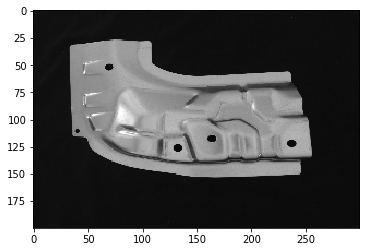

In [48]:
plt.imshow(resized_orig)

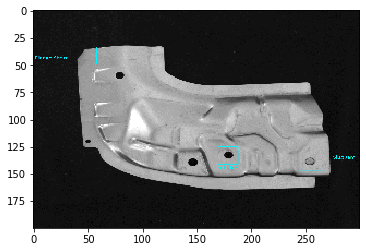

In [49]:
plt.imshow(resized_mod)

In [50]:
# convert the images to grayscale
gray_orig = cv2.cvtColor(resized_orig, cv2.COLOR_BGR2GRAY)
gray_mod = cv2.cvtColor(resized_mod, cv2.COLOR_BGR2GRAY)

In [51]:
# compute the Structural Similarity Index (SSIM) between the two images
(score, diff) = compare_ssim(gray_orig, gray_mod, full=True)

diff = (diff * 255).astype("uint8")

print("Structural Similarity Index: {}".format(score))

Structural Similarity Index: 0.48878274431029567


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [53]:
# loop over the contours
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(resized_orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(resized_mod, (x, y), (x + w, y + h), (0, 0, 255), 2)

In [54]:
# show the output images
cv2.imshow("Original", resized_orig)
cv2.imshow("Modified", resized_mod)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)

-1

In [55]:
difference = cv2.subtract(resized_orig, resized_mod)

In [56]:
# color the mask red
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

In [57]:
# add the red mask to the images to make the differences obvious
resized_orig[mask != 255] = [0, 0, 255]
resized_mod[mask != 255] = [0, 0, 255]

In [58]:
# store images
cv2.imwrite('diffOverImage1.png', resized_orig)
cv2.imwrite('diffOverImage2.png', resized_mod)
cv2.imwrite('diff.png', difference)

True